In [111]:
import pandas as pd

# Step 1: Load the dataset
file_path = "Angola FX rates (shared with candidates) - Angola raw data.csv"
df_raw = pd.read_csv(file_path, header=None)

# Display the first few rows to confirm data loaded correctly
print(df_raw.head())

          0         1   2         3          4   5         6          7
0      Date       USD NaN      Date        GBP NaN      Date        EUR
1  6-Jan-04  79.01866 NaN  6-Jan-04  140.84286 NaN  6-Jan-04   99.68994
2  7-Jan-04  78.87716 NaN  7-Jan-04  143.36713 NaN  7-Jan-04  100.33175
3  8-Jan-04  78.84478 NaN  8-Jan-04  143.09539 NaN  8-Jan-04   99.77018
4  9-Jan-04  78.90775 NaN  9-Jan-04   143.2728 NaN  9-Jan-04   99.38431


In [98]:
# Step 2: Clean the data

# Rename columns for clarity
df_raw.columns = ['Date1', 'USD', 'NaN1', 'Date2', 'GBP', 'NaN2', 'Date3', 'EUR']

# Create a single 'Date' column by taking the 'Date1' values
df_raw['Date'] = df_raw['Date1']

# Drop the unnecessary 'Date' columns and 'NaN' columns
df_cleaned = df_raw.drop(columns=['Date1', 'NaN1', 'Date2', 'NaN2', 'Date3'])

# Remove the repeated column header row if present
df_cleaned = df_cleaned[df_cleaned['Date'] != 'Date']

# Display the cleaned data
print(df_cleaned.head())

        USD        GBP        EUR       Date
1  79.01866  140.84286   99.68994   6-Jan-04
2  78.87716  143.36713  100.33175   7-Jan-04
3  78.84478  143.09539   99.77018   8-Jan-04
4  78.90775   143.2728   99.38431   9-Jan-04
5  78.92975  144.73348  100.50125  12-Jan-04


In [99]:
# Step 3: Identify missing data for each currency
missing_data = df_cleaned[['USD', 'GBP', 'EUR']].isna().sum()

print("Missing data count for each currency:")
print(missing_data)

Missing data count for each currency:
USD     2
GBP    69
EUR    65
dtype: int64


In [100]:
# Convert 'Date' column to datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%b-%y', errors='coerce')

# Filter for the date range
start_date = '2004-01-06'
end_date = '2023-11-30'
df_filtered = df_cleaned[(df_cleaned['Date'] >= start_date) & (df_cleaned['Date'] <= end_date)]

# Find rows with any missing currency value
missing_dates = df_filtered[df_filtered[['USD', 'GBP', 'EUR']].isna().any(axis=1)]

# Display the result
print("Dates with any missing data:")
print(missing_dates[['Date', 'USD', 'GBP', 'EUR']])

Dates with any missing data:
           Date       USD        GBP       EUR
472  2005-11-19       NaN  138.96112  95.37512
516  2006-01-23  80.23865  142.05157       NaN
1117 2008-10-08    74.841    106.646       NaN
1136 2008-11-10    74.834    106.754       NaN
1155 2008-12-17    75.193    109.688       NaN
...         ...       ...        ...       ...
4821 2023-11-24   827.716        NaN       NaN
4822 2023-11-27   827.716        NaN       NaN
4823 2023-11-28   827.793        NaN       NaN
4824 2023-11-29   827.793        NaN       NaN
4825 2023-11-30   827.793        NaN       NaN

[75 rows x 4 columns]


In [101]:
# Step: Remove weekends (Saturday=5, Sunday=6)
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_no_weekends = df_cleaned[~df_cleaned['Date'].dt.weekday.isin([5, 6])]

# Display sample to confirm
print(df_no_weekends.head())

        USD        GBP        EUR       Date
1  79.01866  140.84286   99.68994 2004-01-06
2  78.87716  143.36713  100.33175 2004-01-07
3  78.84478  143.09539   99.77018 2004-01-08
4  78.90775   143.2728   99.38431 2004-01-09
5  78.92975  144.73348  100.50125 2004-01-12


In [102]:
df_no_weekends = df_no_weekends.copy()

# Add a new column for the year
df_no_weekends['Year'] = df_no_weekends['Date'].dt.year

# Now, create the pivot table showing missing data count for each currency by year
pivot = df_no_weekends.groupby('Year')[['USD', 'GBP', 'EUR']].apply(lambda x: x.isna().sum())

# Display the pivot table
print(pivot)

      USD  GBP  EUR
Year               
2004    0    0    0
2005    0    0    0
2006    0    0    1
2007    0    0    0
2008    0    0    3
2009    0    0    0
2010    0    1    0
2011    0    0    0
2012    0    0    0
2013    0    0    0
2014    0    1    0
2015    1    1    0
2016    0    1    0
2017    0    0    0
2018    0    0    0
2019    0    0    0
2020    0    0    0
2021    0    0    0
2022    0    0    0
2023    0   65   61


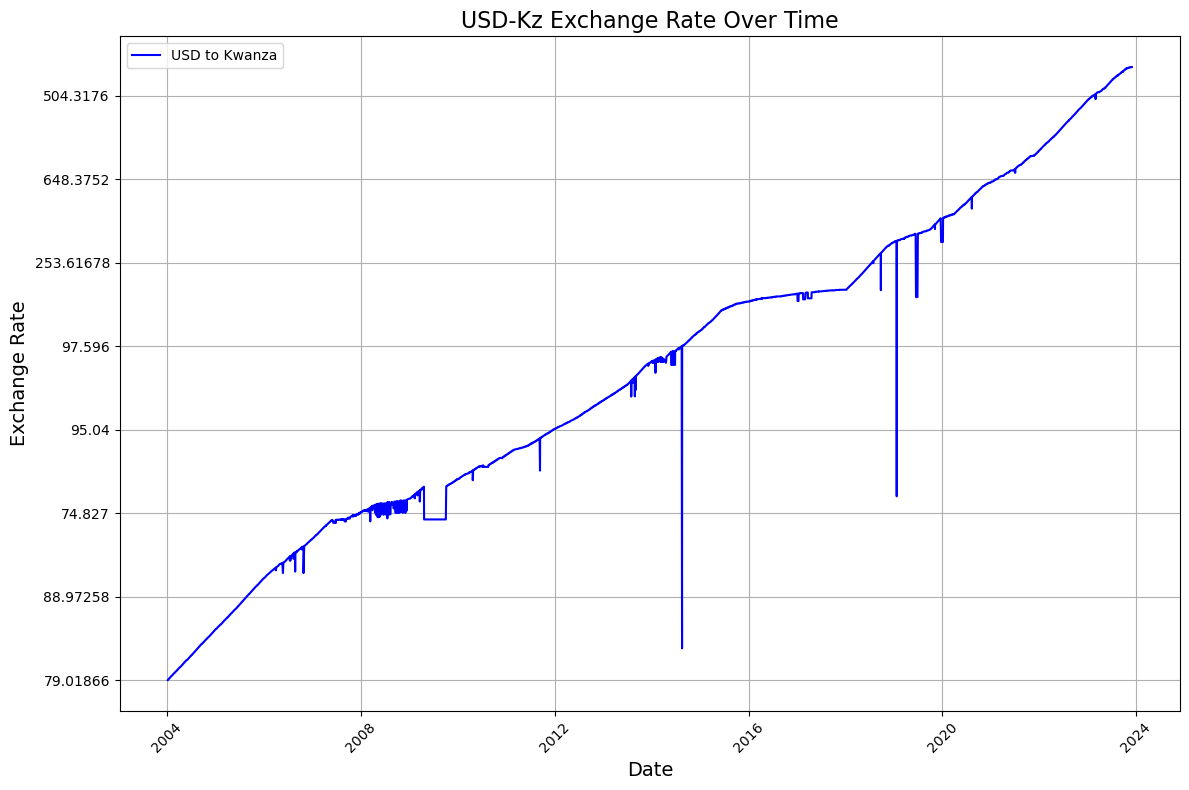

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plotting the USD-Kz exchange rate over time
plt.figure(figsize=(12, 8))  # Increase figure size
plt.plot(df_no_weekends['Date'], df_no_weekends['USD'], label='USD to Kwanza', color='blue')

# Add title and labels
plt.title('USD-Kz Exchange Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Exchange Rate', fontsize=14)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Adjust Y-axis with MaxNLocator to prevent label crowding
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower'))

# Optionally, set custom Y-axis limits
# plt.ylim(min(df_no_weekends['USD']) - 10, max(df_no_weekends['USD']) + 10)

# Add legend and grid
plt.legend()
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('usd_to_kwanza_plot.png')

# Show the plot
plt.show()